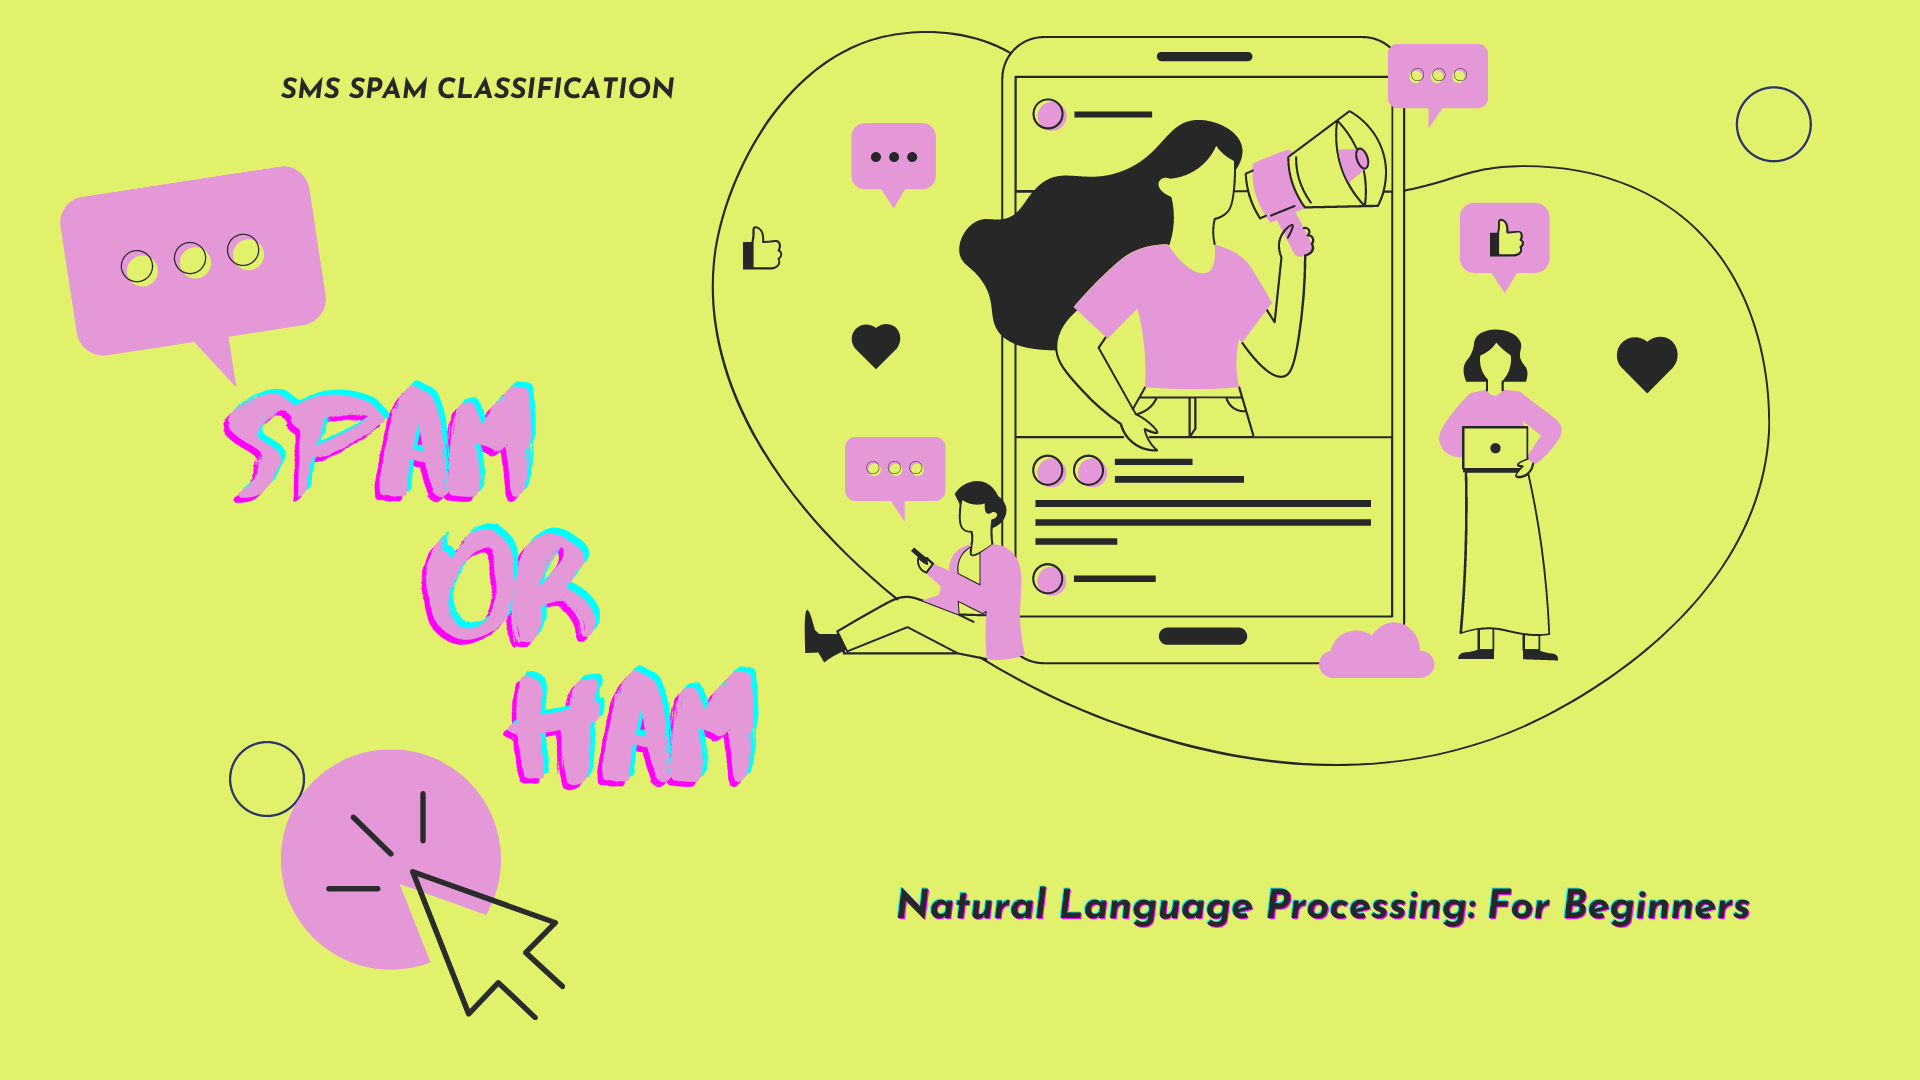

In [ ]:
# pip install scikit-learn==1.1.3
# !pip install --upgrade scikit-learn

- 1. IMPORTING LIBRARIES

Load all necessary libraries and modules required for the project.

- 2. LOADING DATA

Import the dataset and verify its structure using basic exploratory commands (head, info, describe, etc.).

- 3. DATA EXPLORATION

3.1 Feature Engineering

Create meaningful features from the raw data.

Identify and handle outliers using statistical methods or visualizations.

- 4. DATA PREPROCESSING

4.1 Cleaning Text

Remove unwanted characters, symbols, or HTML tags.

4.2 Tokenization

Break down sentences into individual words (tokens).

4.3 Removing Stopwords

Eliminate commonly used words that do not add value (e.g., "the", "is").

4.4 Lemmatization

Reduce words to their base forms (e.g., "running" → "run").

- 5. VECTORIZATION

Convert textual data into numerical formats using techniques like:
Bag of Words (BoW)
TF-IDF
Word2Vec, etc.

- 6. MODEL BUILDING

Train machine learning models such as Logistic Regression, Random Forest, SVM, or Naive Bayes.

- 7. EVALUATING MODELS

Assess model performance using metrics like:
Accuracy
Precision
Recall
F1-score
Confusion Matrix

8. END

Summarize findings, draw conclusions, and discuss improvements or next steps.

In [ ]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics

#`LOADING DATA`

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Dropping the redundent looking collumns (for this project)
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
df=df.rename(columns={'v1':'Target','v2':'Text'})

In [ ]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.describe()

,Target,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
L=LabelEncoder()
df['Target']=L.fit_transform(df['Target'])

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

#`DATA EXPLORATION`

In [ ]:
df['Target'].value_counts().reset_index()

,Target,count
0,0,4516
1,1,653


In [ ]:
fig = px.bar(
    df['Target'].value_counts().reset_index(),
    x='Target',  # X-axis (categories)
    y='count',  # Y-axis (counts)
    color='Target',  # Color based on categories
    title="Count Plot for Target",text_auto=True,
    labels={'index': 'Target', 'Target': 'Count'}
)

# Customizing the plot
fig.update_traces(textposition='outside', text=df['Target'].value_counts())
fig.update_layout(
    title_font_size=20,
    xaxis_title="Target Categories",
    yaxis_title="Count",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    plot_bgcolor="white"
)

fig.show()

###`Note: From the above countplot the data imbalance is quite evident.`

#`Feature engg.`

##`For the purpose of data exploration, I am creating new features`

- No_of_Characters: Number of characters in the text message

- No_of_Words: Number of words in the text message

- No_of_sentence: Number of sentences in the text message

In [ ]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df["No_of_Characters"] = df["Text"].apply(len)
df["num_words"]=df.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
df["count_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)

In [ ]:
df.head()

,Target,Text,No_of_Characters,num_words,count_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Set the option to display full column content without truncation
pd.set_option('max_colwidth', None)
df.head()

,Target,Text,No_of_Characters,num_words,count_sentence
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1


In [ ]:
df[df['Target']==0].describe()

,Target,No_of_Characters,num_words,count_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [ ]:
##Spam
df[df['Target']==1].describe()

,Target,No_of_Characters,num_words,count_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='No_of_Characters', ylabel='Count'>

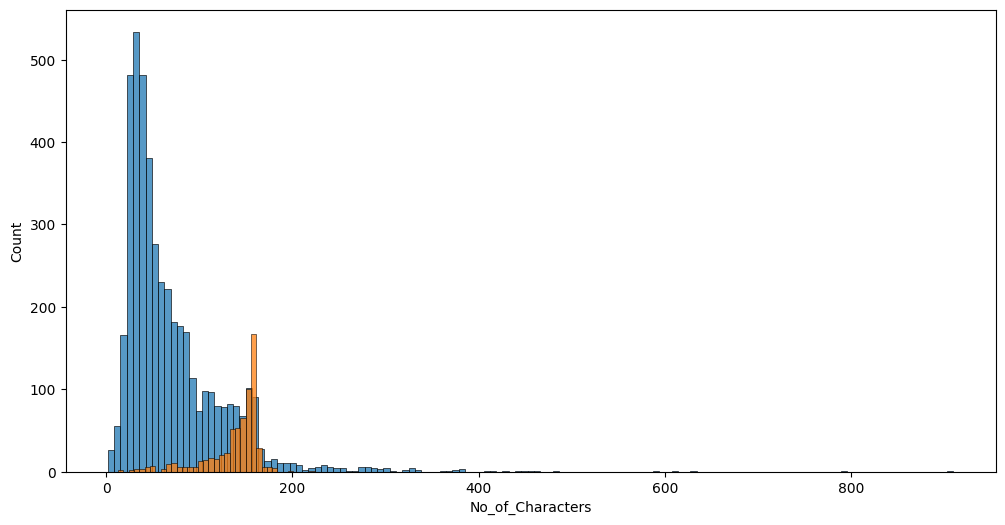

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['No_of_Characters'])
sns.histplot(df[df['Target']==1]['No_of_Characters'])

<Axes: xlabel='num_words', ylabel='Count'>

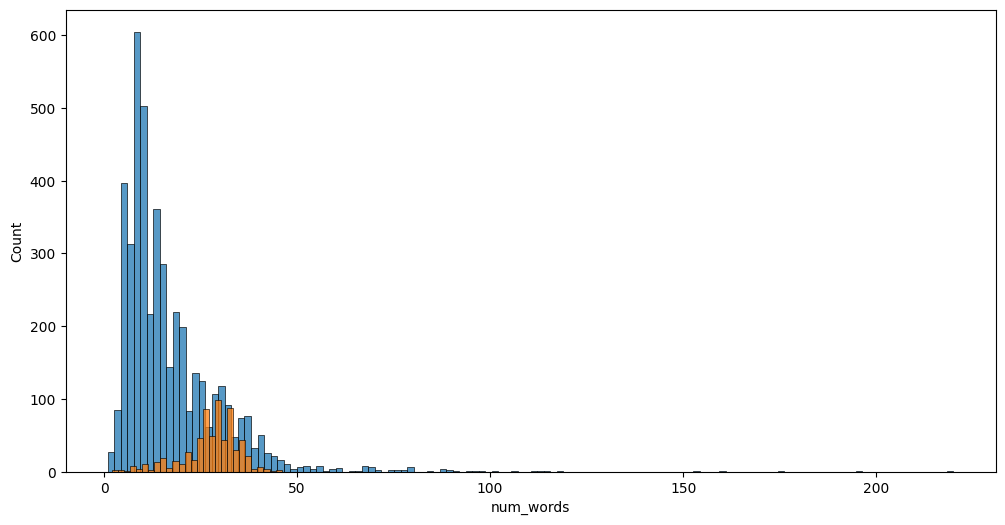

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'])

<Axes: xlabel='count_sentence', ylabel='Count'>

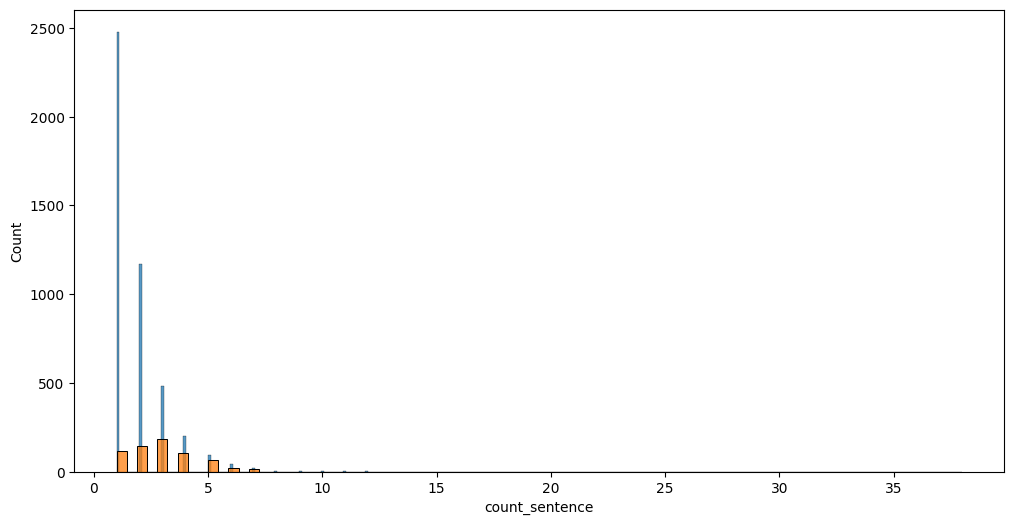

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['count_sentence'])
sns.histplot(df[df['Target']==1]['count_sentence'])

<Figure size 1200x800 with 0 Axes>

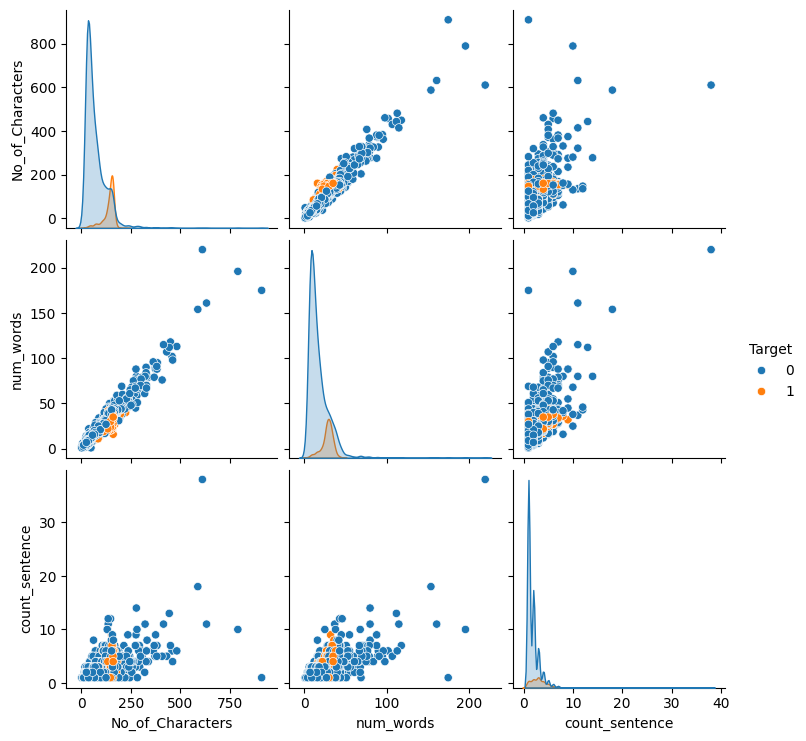

In [ ]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=df, hue="Target")
plt.show(fg)

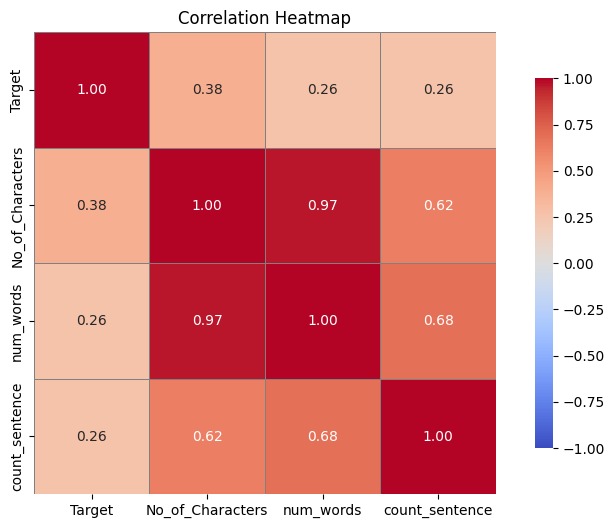

In [ ]:
corr_matrix = df.select_dtypes('int').corr()

# Create a custom heatmap
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
sns.heatmap(corr_matrix,
            annot=True,            # Display correlation values inside the squares
            cmap='coolwarm',       # Color map style
            fmt='.2f',             # Format for the annotations
            linewidths=0.5,        # Width of the lines between cells
            linecolor='gray',      # Color of the lines between cells
            cbar_kws={'shrink': 0.8},  # Customize the color bar
            square=True,           # Ensure the heatmap is square
            vmin=-1, vmax=1,       # Set the color scale range
            mask=corr_matrix.abs() < 0.1)  # Optional: Mask low correlation values

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# df=df.drop(columns=['count_sentence','num_words'])

#`DATA PREPREPROCESSING`
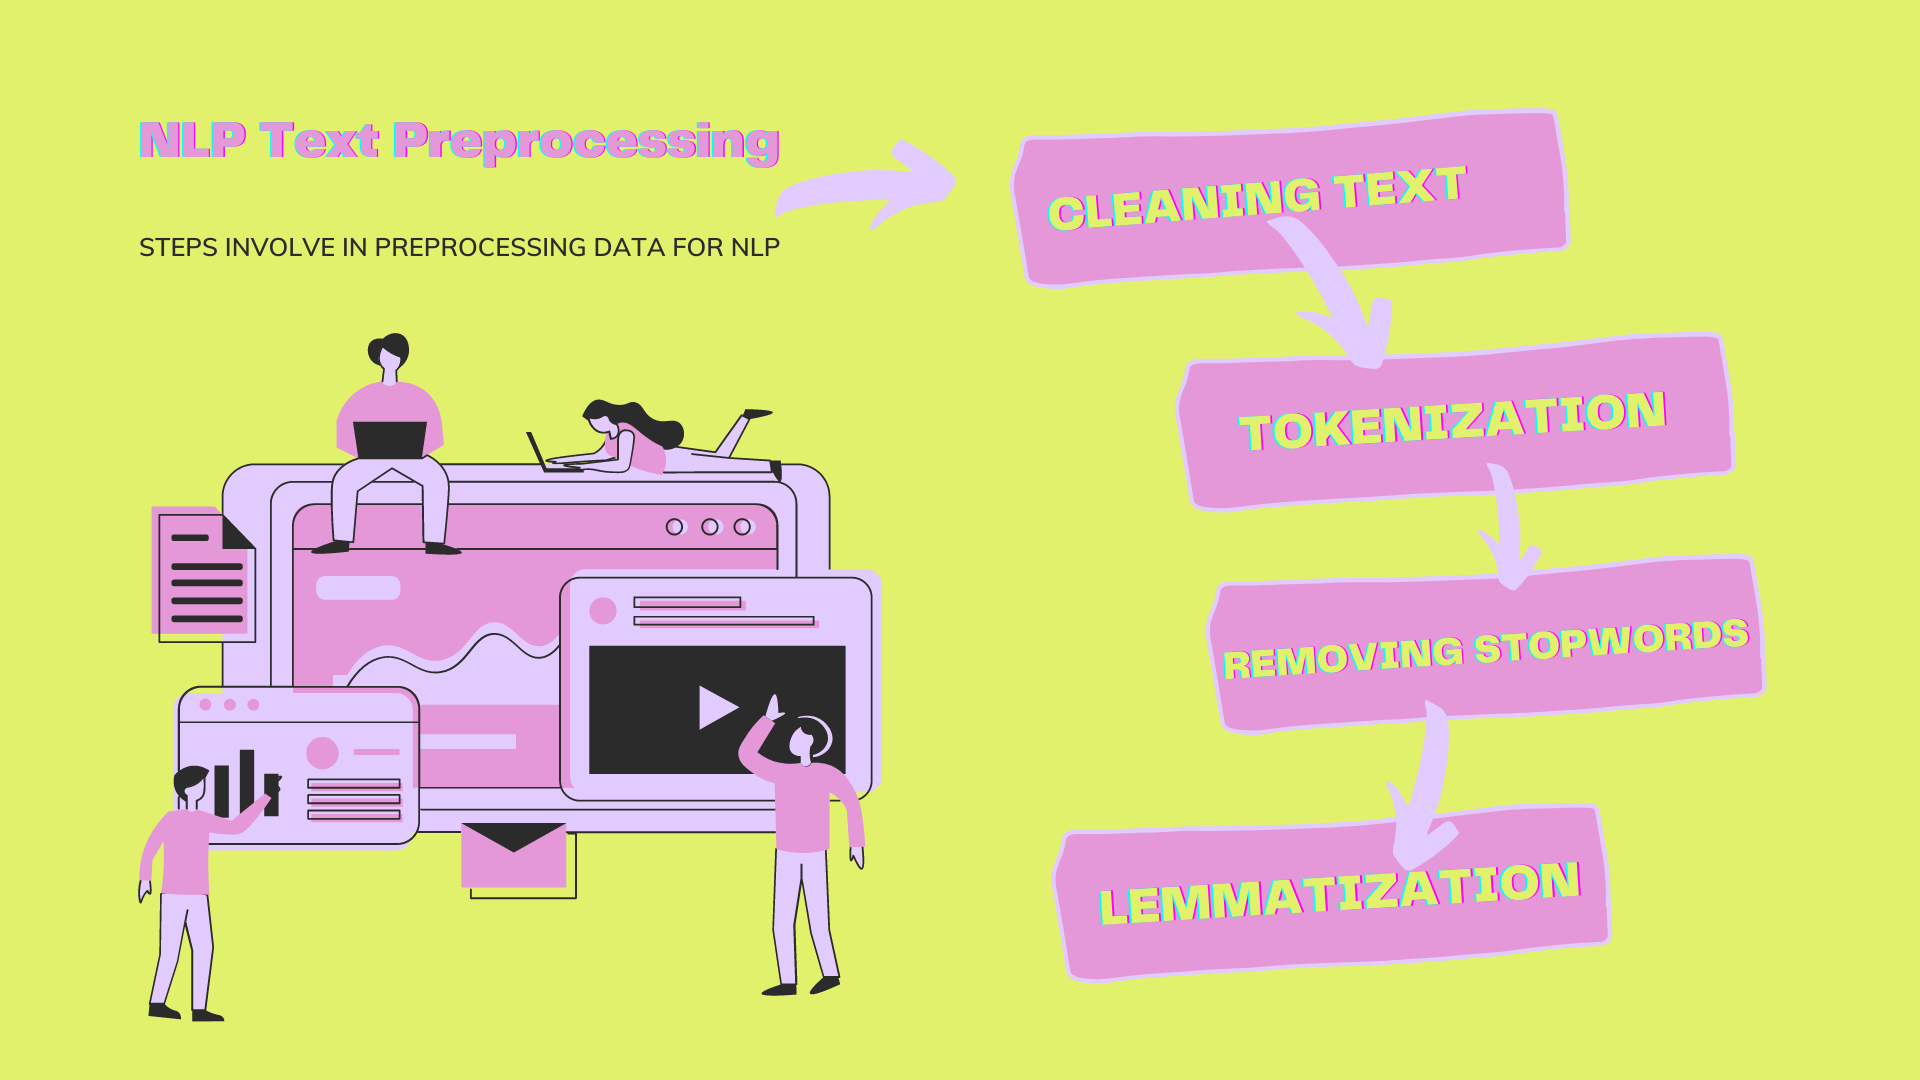

In [ ]:
df['Text']=df['Text'].apply(lambda x:x.lower())

In [ ]:
import re
def preprocessing_alphanum_pattern(text):
  alphanum=r'[^a-zA-Z0-9]'
  sms=re.sub(alphanum,' ',text)
  return  sms

In [ ]:
df['Text']=df['Text'].apply(preprocessing_alphanum_pattern)

In [ ]:
df['Text']

,Text
0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ok lar joking wif u oni
2,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3,u dun say so early hor u c already then say
4,nah i don t think he goes to usf he lives around here though
...,...
5567,this is the 2nd time we have tried 2 contact u u have won the 750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute bt national rate
5568,will b going to esplanade fr home
5569,pity was in mood for that so any other suggestions
5570,the guy did some bitching but i acted like i d be interested in buying something else next week and he gave it to us for free


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

In [ ]:
# ## Defining set containing all stopwords in english.
# stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
#              'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
#              'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
#              'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
#              'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
#              'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
#              'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
#              'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
#              'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
#              's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
#              't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
#              'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
#              'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
#              'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
#              'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
#              "youve", 'your', 'yours', 'yourself', 'yourselves']
# len(stopwordlist)

In [ ]:
from nltk.tokenize import word_tokenize
def preprocessing(text):
  tokens = word_tokenize(text)
  stop_words=set(stopwords.words('english'))
  filter_words=[word for word in tokens if word.lower() not in stop_words ]
  return filter_words

In [ ]:
! pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
preprocessing('the guy did some bitching but i acted like i d be interested in buying something else next week and he gave it to us for free')

['guy',
 'bitching',
 'acted',
 'like',
 'interested',
 'buying',
 'something',
 'else',
 'next',
 'week',
 'gave',
 'us',
 'free']

In [ ]:
df['Text']=df['Text'].apply(preprocessing)

In [ ]:
# Download required resources
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text])

In [ ]:
lemmatization(['guy',
 'bitching',
 'acted',
 'like',
 'interested',
 'buying',
 'something',
 'else',
 'next',
 'week',
 'gave',
 'us',
 'free']
)

'guy bitching acted like interested buying something else next week gave u free'

In [ ]:
df['Text']=df['Text'].apply(lemmatization)

In [ ]:
df['Text']

,Text
0,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18
3,u dun say early hor u c already say
4,nah think go usf life around though
...,...
5567,2nd time tried 2 contact u u 750 pound prize 2 claim easy call 087187272008 now1 10p per minute bt national rate
5568,b going esplanade fr home
5569,pity mood suggestion
5570,guy bitching acted like interested buying something else next week gave u free


#`Word-Cloud for ham sms.`

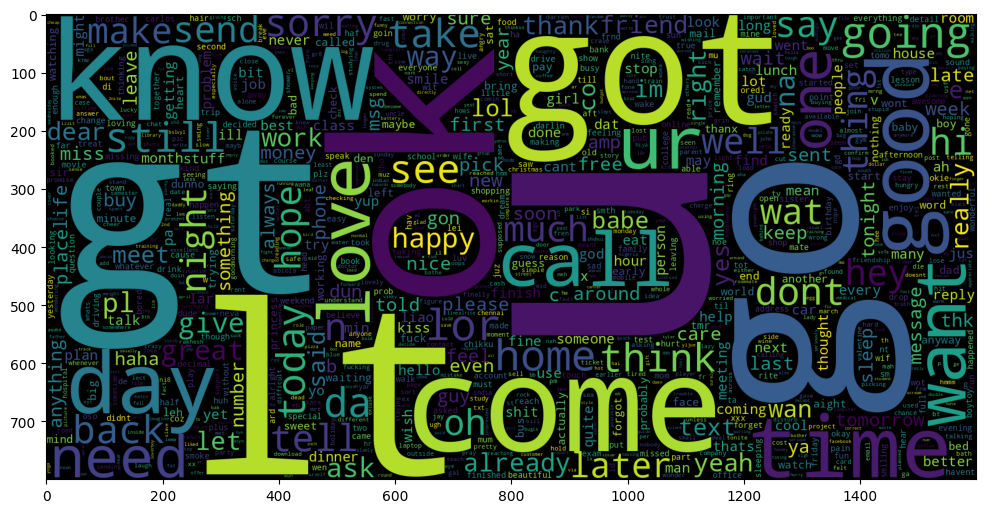

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(12,12))
data=df[df['Target']==0]['Text']
wc=WordCloud(max_words=1000,height=800,width=1600,collocations=False).generate(" ".join(data))
plt.imshow(wc)

#`Word-Cloud for spam sms`

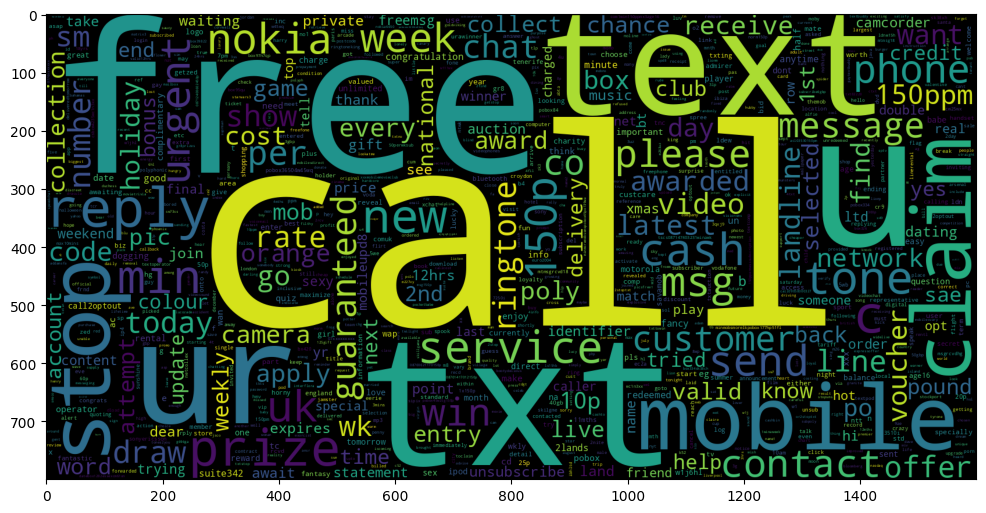

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(12,12))
data=df[df['Target']==1]['Text']
wc=WordCloud(max_words=1000,height=800,width=1600,collocations=False).generate(" ".join(data))
plt.imshow(wc)

In [ ]:
spam=[]
for msg in df[df['Target']==1]['Text'].to_list():
  for word in msg.split():
    spam.append(word)

In [ ]:
from collections import Counter
most_frequent_50_spam_sms_words=Counter(spam).most_common(50)
most_frequent_50_spam_sms_words

[('call', 325),
 ('free', 195),
 ('2', 184),
 ('u', 155),
 ('txt', 134),
 ('text', 127),
 ('ur', 119),
 ('mobile', 118),
 ('4', 114),
 ('stop', 109),
 ('claim', 98),
 ('reply', 97),
 ('1', 94),
 ('c', 88),
 ('prize', 83),
 ('www', 83),
 ('get', 71),
 ('min', 71),
 ('tone', 70),
 ('cash', 65),
 ('service', 65),
 ('150p', 64),
 ('new', 64),
 ('uk', 63),
 ('send', 59),
 ('urgent', 58),
 ('msg', 58),
 ('nokia', 56),
 ('week', 55),
 ('phone', 52),
 ('win', 51),
 ('contact', 51),
 ('please', 50),
 ('com', 47),
 ('50', 46),
 ('co', 43),
 ('message', 43),
 ('18', 43),
 ('customer', 42),
 ('guaranteed', 42),
 ('per', 41),
 ('16', 39),
 ('3', 37),
 ('1000', 37),
 ('chat', 37),
 ('500', 36),
 ('draw', 35),
 ('number', 35),
 ('rate', 33),
 ('100', 33)]

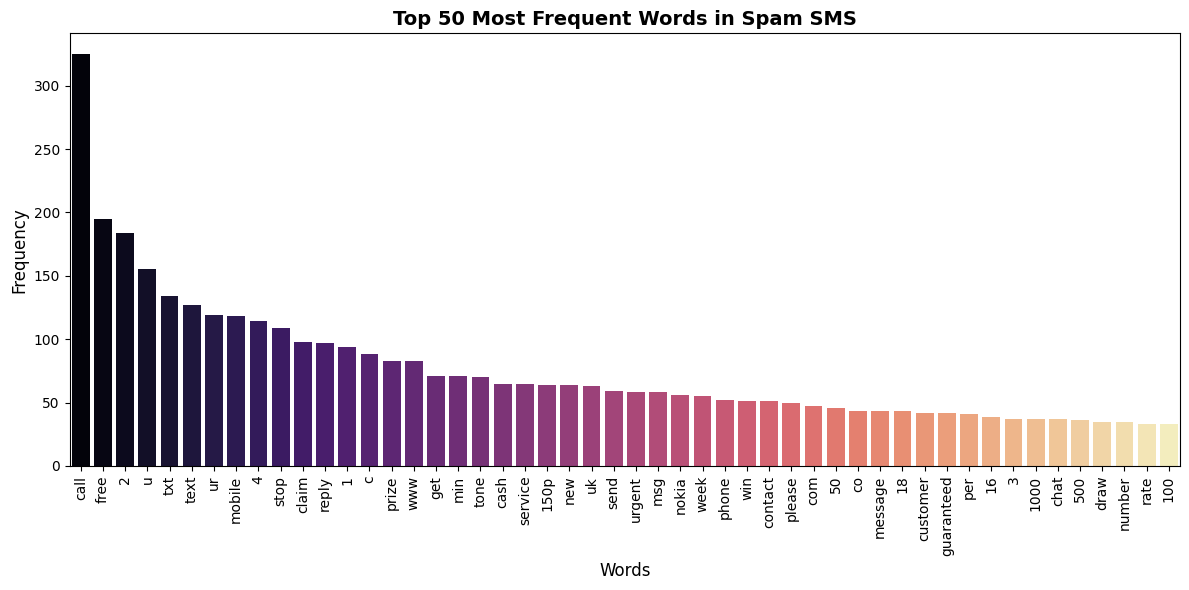

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
X = pd.DataFrame(most_frequent_50_spam_sms_words, columns=["Word", "Frequency"])

# Create bar plot
plt.figure(figsize=(12, 6))  # Adjust size for better readability
sns.barplot(data=X, x="Word", y="Frequency",palette='magma')  # Palette for aesthetics

# Customize plot
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.title("Top 50 Most Frequent Words in Spam SMS", fontsize=14, fontweight="bold")  # Add title
plt.xlabel("Words", fontsize=12)  # Label for x-axis
plt.ylabel("Frequency", fontsize=12)  # Label for y-axis
plt.xticks(rotation=90)
# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
ham=[]
for msg in df[df['Target']==0]['Text'].to_list():
  for word in msg.split():
    ham.append(word)

In [ ]:
from collections import Counter
most_frequent_50_ham_sms_words=Counter(ham).most_common(50)
most_frequent_50_ham_sms_words

[('u', 969),
 ('get', 308),
 ('2', 302),
 ('gt', 288),
 ('lt', 287),
 ('go', 267),
 ('ok', 255),
 ('got', 238),
 ('know', 233),
 ('come', 226),
 ('like', 225),
 ('time', 217),
 ('good', 216),
 ('day', 212),
 ('call', 200),
 ('ur', 198),
 ('love', 186),
 ('want', 180),
 ('4', 171),
 ('need', 169),
 ('one', 165),
 ('going', 164),
 ('lor', 159),
 ('home', 156),
 ('still', 145),
 ('da', 143),
 ('k', 138),
 ('see', 135),
 ('r', 133),
 ('take', 131),
 ('think', 130),
 ('today', 129),
 ('back', 127),
 ('n', 124),
 ('dont', 123),
 ('sorry', 122),
 ('tell', 120),
 ('hi', 117),
 ('well', 111),
 ('send', 111),
 ('much', 111),
 ('oh', 110),
 ('thing', 110),
 ('say', 109),
 ('night', 108),
 ('make', 107),
 ('hope', 107),
 ('hey', 107),
 ('wat', 102),
 ('later', 100)]

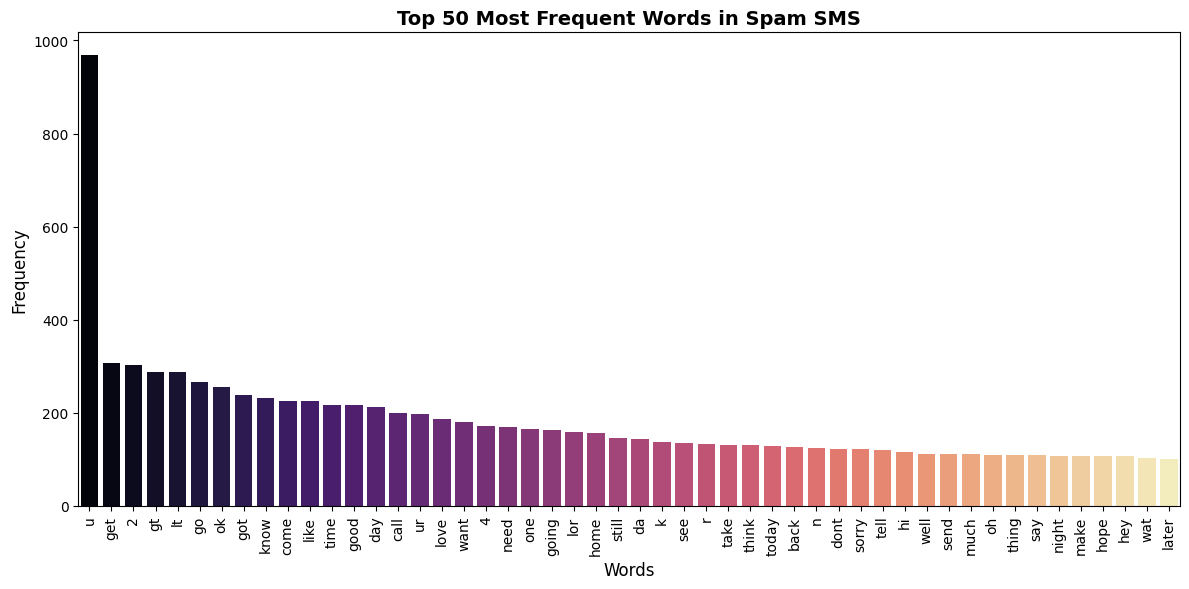

In [ ]:
X = pd.DataFrame(most_frequent_50_ham_sms_words, columns=["Word", "Frequency"])

# Create bar plot
plt.figure(figsize=(12, 6))  # Adjust size for better readability
sns.barplot(data=X, x="Word", y="Frequency",palette='magma')  # Palette for aesthetics

# Customize plot
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.title("Top 50 Most Frequent Words in Spam SMS", fontsize=14, fontweight="bold")  # Add title
plt.xlabel("Words", fontsize=12)  # Label for x-axis
plt.ylabel("Frequency", fontsize=12)  # Label for y-axis
plt.xticks(rotation=90)
# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#`vectorization`

In [ ]:
#Changing text data in to numbers.
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Text']).toarray()
#Let's have a look at our feature
X.dtype

dtype('float64')

In [ ]:
df.shape

(5169, 5)

In [ ]:
X.shape

(5169, 3000)

#`Model building`

In [ ]:
df.head(1)

,Target,Text,No_of_Characters,num_words,count_sentence
0,0,go jurong point crazy available bugis n great world la e buffet cine got amore wat,111,24,2


In [ ]:
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classification=[MultinomialNB(),
               RandomForestClassifier(),
               KNeighborsClassifier(),
               SVC()]
for clf in classification:
  clf.fit(X_train,y_train)
  print(f"{clf.__class__.__name__} trained successfully.")


MultinomialNB trained successfully.
RandomForestClassifier trained successfully.
KNeighborsClassifier trained successfully.
SVC trained successfully.


In [ ]:
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [ ]:
# !pip install --upgrade threadpoolctl scikit-learn

In [ ]:
# import os
# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["MKL_NUM_THREADS"] = "1"

In [ ]:
for i,model in enumerate(classification):
  cv_score=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=10, n_jobs=-1)
  print(f"{pipe_dict[i]}:{np.mean(cv_score):.4f}")

NaiveBayes:0.9756
RandomForest:0.9768
KNeighbours:0.9103
SVC:0.9753


#`Model Evaluation`

In [ ]:
precision_score(y_test, clf.predict(X_test))

0.9921875

In [ ]:
precision_list = []  # List to store precision scores
recall_list = []     # List to store recall scores
f1_score_list = []   # List to store f1 scores
training_accuracy = []  # List to store training accuracy
test_accuracy = []      # List to store test accuracy

# Loop through classifiers
for clf in classification:
    # Calculate precision, recall, and f1 score
    precision_val = metrics.precision_score(y_test, clf.predict(X_test))
    recall_val = metrics.recall_score(y_test, clf.predict(X_test))
    f1_s = metrics.f1_score(y_test, clf.predict(X_test))

    # Calculate accuracy
    train_accuracy_val = clf.score(X_train, y_train)  # Use clf, not model
    test_accuracy_val = clf.score(X_test, y_test)    # Use clf, not model

    # Append scores to the lists
    precision_list.append(precision_val)
    recall_list.append(recall_val)
    f1_score_list.append(f1_s)
    training_accuracy.append(train_accuracy_val)
    test_accuracy.append(test_accuracy_val)

# Optionally, print the results
print("Precision:", precision_list)
print("Recall:", recall_list)
print("F1 Score:", f1_score_list)
print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)


Precision: [0.9836065573770492, 0.992, 1.0, 0.9921875]
Recall: [0.8275862068965517, 0.8551724137931035, 0.31724137931034485, 0.8758620689655172]
F1 Score: [0.898876404494382, 0.9185185185185185, 0.4816753926701571, 0.9304029304029304]
Training Accuracy: [0.9854897218863361, 0.999758162031439, 0.9267230955259976, 0.9973397823458283]
Test Accuracy: [0.9738878143133463, 0.9787234042553191, 0.9042553191489362, 0.9816247582205029]


In [ ]:
data = {'Precision':precision_list,
'Recall':recall_list,
'F1score':f1_score_list,
'Accuracy on Testset':training_accuracy,
'Accuracy on Trainset': test_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

##`In spam classification problem precision matters the most`

In [ ]:
Results

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.983607,0.827586,0.898876,0.985490,0.973888
RandomForest,0.992000,0.855172,0.918519,0.999758,0.978723
KNeighbours,1.000000,0.317241,0.481675,0.926723,0.904255
SVC,0.992188,0.875862,0.930403,0.997340,0.981625


In [ ]:
Results.sort_values(by=['Precision','Accuracy on Trainset','Accuracy on Testset'],ascending=False)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
KNeighbours,1.000000,0.317241,0.481675,0.926723,0.904255
SVC,0.992188,0.875862,0.930403,0.997340,0.981625
RandomForest,0.992000,0.855172,0.918519,0.999758,0.978723
NaiveBayes,0.983607,0.827586,0.898876,0.985490,0.973888


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=50, random_state=42)
model=etc.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
cv_score=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=10, n_jobs=-1)

In [ ]:
print(np.mean(cv_score))

0.9804102186195038


In [ ]:
precision_val = metrics.precision_score(y_test, model.predict(X_test))
recall_val = metrics.recall_score(y_test,model.predict(X_test))
f1_s = metrics.f1_score(y_test, model.predict(X_test))
# Calculate accuracy
train_accuracy_val = model.score(X_train, y_train)  # Use clf, not model
test_accuracy_val = model.score(X_test, y_test)    # Use clf, not model

In [ ]:
# Optionally, print the results
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_s)
print("Training Accuracy:", train_accuracy_val )
print("Test Accuracy:",test_accuracy_val )

Precision: 0.9844961240310077
Recall: 0.8758620689655172
F1 Score: 0.927007299270073
Training Accuracy: 0.999758162031439
Test Accuracy: 0.9806576402321083


##`Voting algo`

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1,probability=True)
rf=RandomForestClassifier(n_estimators=50, random_state=2)
knn=KNeighborsClassifier(weights='uniform')
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('svm',svc,),('rfc',rf),('KNN',knn)],voting='soft')

In [ ]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1, kernel='sigmoid', probability=True)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

In [ ]:
precision_val = metrics.precision_score(y_test, vc.predict(X_test))
recall_val = metrics.recall_score(y_test,vc.predict(X_test))
f1_s = metrics.f1_score(y_test, vc.predict(X_test))
# Calculate accuracy
train_accuracy_val = vc.score(X_train, y_train)  # Use clf, not model
test_accuracy_val = vc.score(X_test, y_test)    # Use clf, not model

# Optionally, print the results
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_s)
print("Training Accuracy:", train_accuracy_val )
print("Test Accuracy:",test_accuracy_val )

Precision: 1.0
Recall: 0.8482758620689655
F1 Score: 0.917910447761194
Training Accuracy: 0.9937122128174123
Test Accuracy: 0.9787234042553191


In [ ]:
estimators=[('svm',svc,),('rfc',rf),('KNN',knn)]
final_estimators=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
ss=StackingClassifier(estimators=estimators,final_estimator=final_estimators)
ss.fit(X_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1, kernel='sigmoid',
                                    probability=True)),
                               ('rfc',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier())

In [ ]:
precision_val = metrics.precision_score(y_test, ss.predict(X_test))
recall_val = metrics.recall_score(y_test,ss.predict(X_test))
f1_s = metrics.f1_score(y_test, ss.predict(X_test))
# Calculate accuracy
train_accuracy_val = ss.score(X_train, y_train)  # Use clf, not model
test_accuracy_val = ss.score(X_test, y_test)    # Use clf, not model

# Optionally, print the results
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_s)
print("Training Accuracy:", train_accuracy_val )
print("Test Accuracy:",test_accuracy_val )

Precision: 0.9256756756756757
Recall: 0.9448275862068966
F1 Score: 0.9351535836177475
Training Accuracy: 0.9970979443772672
Test Accuracy: 0.9816247582205029


In [ ]:
import pickle
file=open('tfidf_file','wb')
pickle.dump(tfidf ,file)
file.close()

import pickle
file=open('voting_count_algo_file','wb')
pickle.dump(vc ,file)
file.close()

In [ ]:
# ! pip install streamlit

In [ ]:
# !pip install nltk

In [33]:
! pip install streamlit -q

In [34]:
!wget -q -O - ipv4.icanhazip.com

34.23.76.167


In [35]:
!npm install -g localtunnel@2.0.2

⠙⠹⠸⠼⠴⠦⠧⠇⠏
changed 22 packages in 1s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [36]:
%%writefile app.py
import nltk
import pickle
import numpy as np
import string
import streamlit as st
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Install necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

# Define the text transformation function
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Load the trained model and vectorizer
file_ = open('/content/tfidf_file', 'rb')
tfidf = pickle.load(file_)
file1 = open('/content/voting_count_algo_file', 'rb')
vc = pickle.load(file1)

# Streamlit interface
st.title('Email/SMS Spam Classifier')
input_sms = st.text_input("Enter the message")

# Button to trigger prediction
if st.button('Predict'):
    # Transform the text from input
    transformed_sms = transform_text(input_sms)

    # Vectorize the input text using the trained TF-IDF vectorizer
    vector_input = tfidf.transform([transformed_sms])  # Transform the input text
    vector_input_dense = vector_input.toarray()

    # Make prediction using the voting classifier model
    predict = vc.predict(vector_input_dense)[0]  # Prediction result

    # Display result based on prediction
    if predict == 1:
        st.header('Spam')
    else:
        st.header('Not Spam')


Overwriting app.py


In [37]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.76.167:8501

⠸⠼⠴⠦your url is: https://twelve-singers-hang.loca.lt
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-12-21 14:11:53.093 Uncaught app execution
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/Email_Spam_Classifier/Email_Spam_Classifier/Email_Spam_Classifier/app.py", line 37, in <module>
    tfidf = pickle.load(file_)
EO